In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2022/data.csv


<h3> Exploring the data

In [2]:
train_df = pd.read_csv("../input/tabular-playground-series-jun-2022/data.csv")

In [3]:
train_df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   row_id  1000000 non-null  int64  
 1   F_1_0   981603 non-null   float64
 2   F_1_1   981784 non-null   float64
 3   F_1_2   981992 non-null   float64
 4   F_1_3   981750 non-null   float64
 5   F_1_4   981678 non-null   float64
 6   F_1_5   981911 non-null   float64
 7   F_1_6   981867 non-null   float64
 8   F_1_7   981872 non-null   float64
 9   F_1_8   981838 non-null   float64
 10  F_1_9   981751 non-null   float64
 11  F_1_10  982039 non-null   float64
 12  F_1_11  981830 non-null   float64
 13  F_1_12  981797 non-null   float64
 14  F_1_13  981602 non-null   float64
 15  F_1_14  981961 non-null   float64
 16  F_2_0   1000000 non-null  int64  
 17  F_2_1   1000000 non-null  int64  
 18  F_2_2   1000000 non-null  int64  
 19  F_2_3   1000000 non-null  int64  
 20  F_2_4   1000000 non-null 

In [5]:
train_df.describe()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,1000000.000000,981603.000000,981784.000000,981992.000000,981750.000000,981678.000000,981911.000000,981867.000000,981872.000000,981838.000000,...,981937.000000,981675.000000,981986.000000,981824.000000,981735.000000,981775.000000,981881.000000,981694.000000,982005.000000,981733.000000
mean,499999.500000,-0.000687,0.002091,0.000551,0.000982,0.002437,0.000635,-0.000124,-0.063857,-0.000014,...,0.335968,0.003773,0.334433,-0.071842,-0.079854,0.038282,0.551900,0.333509,0.330047,0.037223
std,288675.278932,1.000784,0.999878,0.999825,0.999847,1.001151,0.999927,1.000427,0.725986,1.000715,...,2.352749,2.292272,2.358757,0.777855,0.806965,0.706913,4.996632,2.383485,2.364036,0.776354
min,0.000000,-4.664447,-4.790594,-4.870645,-5.053023,-5.363454,-5.508223,-5.199170,-6.990302,-4.566593,...,-12.536923,-11.132350,-11.677862,-10.091950,-9.864310,-10.353951,-26.276588,-11.524137,-10.661978,-9.983739
25%,249999.750000,-0.674667,-0.672284,-0.673783,-0.672211,-0.672326,-0.673884,-0.674834,-0.500305,-0.674006,...,-1.266885,-1.570766,-1.224468,-0.517559,-0.576799,-0.385768,-2.791428,-1.268732,-1.298927,-0.396043
50%,499999.500000,-0.000769,0.002049,0.001386,0.000370,0.002733,0.000276,0.000814,0.000578,-0.000047,...,0.303320,-0.071800,0.379014,0.018222,-0.027811,0.102679,0.203056,0.354137,0.295049,0.131245
75%,749999.250000,0.673181,0.675997,0.674490,0.674852,0.676588,0.675951,0.673983,0.444337,0.674295,...,1.917695,1.521134,1.925968,0.474558,0.480100,0.529550,3.646324,1.947385,1.916931,0.574182
max,999999.000000,5.039177,5.042807,5.130025,5.462472,4.856916,4.960724,4.957977,2.527570,4.886075,...,13.539926,11.524512,12.536151,2.607285,2.814969,2.548404,31.229363,11.341926,11.901409,2.584492


In [6]:
train_df.isnull().sum().sort_values(ascending=False).head(10)

F_4_2     18495
F_1_13    18398
F_1_0     18397
F_3_21    18396
F_3_11    18388
F_3_4     18373
F_3_1     18345
F_4_6     18325
F_1_4     18322
F_4_12    18306
dtype: int64

<h3> Visualizing the missing data values in descending order of missing data percentage. This can be achieved by using the isnull().sum() method and sort the values in descending order. The features can be retrieved by using ".index"

In [7]:
missing_data_percent = (train_df.isnull().sum().sort_values(ascending=False)/len(train_df))*100
missing_features = train_df.isnull().sum().sort_values(ascending=False).index

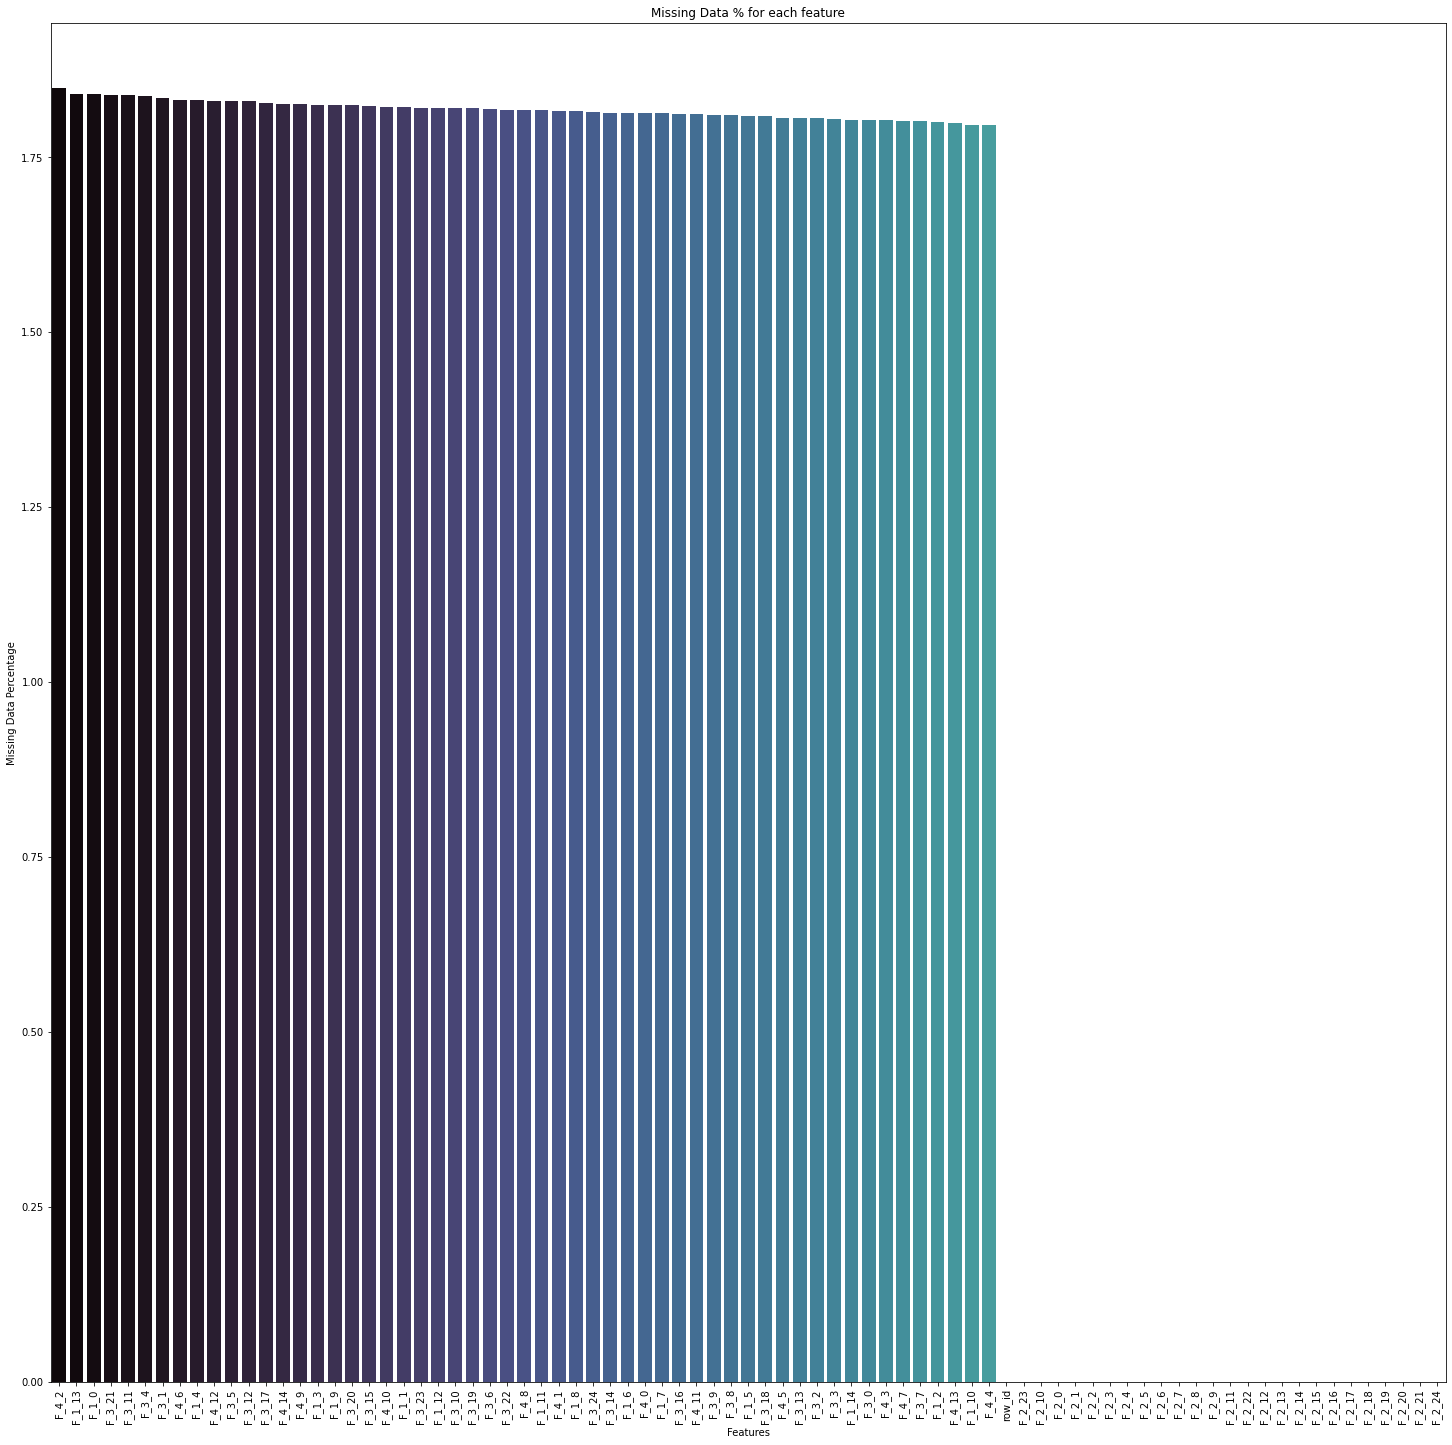

In [8]:
plt.figure(figsize=(25,25))
sns.barplot(y=missing_data_percent,x=missing_features,palette='mako')
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Missing Data Percentage")
plt.title("Missing Data % for each feature")
plt.show()

In [9]:
print(f"Total columns with missing values: {len([x for x in missing_data_percent if x>0])}")

Total columns with missing values: 55


 <h3>
From the above bar graph, it is evident that the percentage of missing data is extremely nominal when compared to the total rows in the dataframe. Usually, if a large portion, say 60% or more of the data is missing, it would make more sense to drop the feature instead of trying to impute.<br><br>
    
* Imputation techniques can be stratified into two categories: <br>
    1. Based on univariate data - Here, techniques such as Mean, Median, Mode can be applied to the respective feature<br>
    2. Based on multivariate data - Here, techniques such as KNN can be used to replace the values of the missing values.<br><br>
    
* However, before beginning to decide the technique for imputation, it is important to inspect whether the rows are missing at random or if there is any trend amongst the features.

In [21]:
missing_df = train_df[train_df['F_4_2'].isnull()]

In [22]:
missing_df

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
61,61,1.444728,-0.640708,0.089641,0.311816,0.181519,0.585157,NaN,0.491914,0.397681,...,2.281325,-3.237768,-1.716573,0.038994,0.106214,-1.525115,2.318862,-1.887232,NaN,0.642325
104,104,-0.724635,0.194566,-0.172825,-1.219292,-0.469456,0.193195,-0.039106,0.221321,-0.826250,...,4.143218,-3.496159,0.143205,0.630603,-0.217443,-1.600671,-5.046841,0.997793,-0.530269,-0.989069
198,198,1.974147,-1.125375,0.046327,0.278001,-0.275549,-0.778628,-0.844264,0.453840,1.615901,...,-1.771382,3.846629,2.884684,0.239307,0.191903,-2.499721,-1.030483,1.812248,-0.649278,0.188002
253,253,0.539524,-0.318525,1.198874,1.132277,0.527884,0.490806,0.025430,0.739256,-1.265309,...,-2.008749,-2.812663,0.452190,0.014323,0.903371,-0.137332,-0.179638,0.873520,-0.532083,0.306225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999575,999575,0.757374,-0.593066,0.682306,1.975839,0.854117,0.101478,0.475064,0.725660,1.289960,...,0.839362,-3.739650,1.294936,0.367330,0.464006,0.385528,1.279090,-0.246879,0.059643,-0.025769
999694,999694,0.461978,1.186521,-0.168743,0.248420,-0.094938,0.294378,1.593341,0.208922,-1.079055,...,-0.299958,1.354007,-2.631701,0.208068,-0.597584,-0.070319,-4.494289,0.038919,2.516924,0.342826
999817,999817,-0.197710,1.027381,NaN,0.312762,1.283528,0.479660,-0.215054,0.127685,-1.628281,...,-3.111222,-4.004978,1.450010,-0.070333,1.010557,-0.111725,0.617451,1.637883,1.770103,0.837843
999861,999861,-0.281747,-0.095524,-0.510118,0.356646,-1.771592,1.496304,-0.420745,-1.609772,-0.510109,...,-2.006754,0.881084,0.267705,-0.153395,1.037707,0.742029,-5.884022,4.041471,-0.428371,0.241486
